In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("mall.csv")

In [3]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
X=df.iloc[:,[3,4]].values

In [13]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [18]:
from sklearn.cluster import KMeans

In [ ]:
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')

In [22]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,random_state=42)
y_kmeans=kmeans.fit_predict(X)

In [23]:
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [24]:
y_kmeans.shape

(200,)

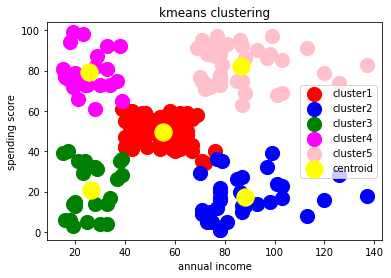

In [29]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=200,c='red',label='cluster1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=200,c='blue',label='cluster2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=200,c='green',label='cluster3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=200,c='magenta',label='cluster4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=200,c='pink',label='cluster5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='centroid')
plt.title("kmeans clustering")
plt.xlabel("annual income")
plt.ylabel("spending score")
plt.legend()
plt.show()


In [30]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples,silhouette_score

In [32]:
range_n_clusters=[2,3,4,5,6]
for n_clusters in range_n_clusters:
    clusterer=KMeans(n_clusters=n_clusters,random_state=10)
    cluster_labels=clusterer.fit_predict(X)
    
    silhouette_avg=silhouette_score(X,cluster_labels)
    print("for n_clusters=",n_clusters,"the average silhouette_score is ",silhouette_avg)


for n_clusters= 2 the average silhouette_score is  0.2968969162503008
for n_clusters= 3 the average silhouette_score is  0.46761358158775435
for n_clusters= 4 the average silhouette_score is  0.4931963109249047
for n_clusters= 5 the average silhouette_score is  0.553931997444648
for n_clusters= 6 the average silhouette_score is  0.5376203956398481


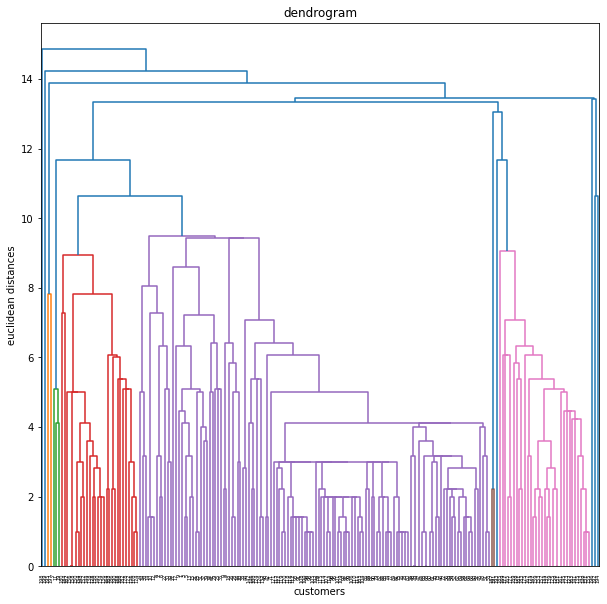

In [33]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,10))
dendrogram=sch.dendrogram(sch.linkage(X,method='single'))
plt.title('dendrogram')
plt.xlabel('customers')
plt.ylabel('euclidean distances')
plt.show()

In [34]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')
y_hc=hc.fit_predict(X)

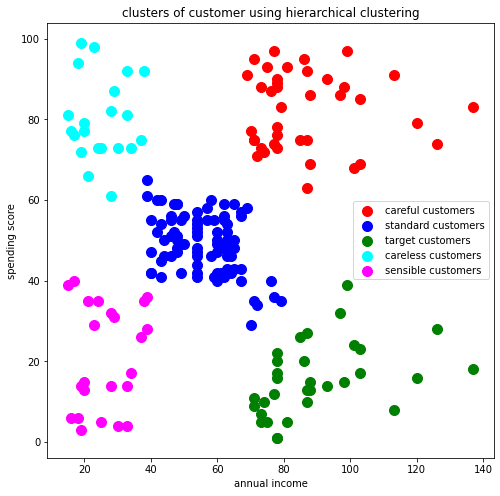

In [35]:
plt.figure(figsize=(8,8))
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='red',label='careful customers')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='blue',label='standard customers')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='green',label='target customers')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=100,c='cyan',label='careless customers')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=100,c='magenta',label='sensible customers')
plt.title("clusters of customer using hierarchical clustering")
plt.xlabel("annual income")
plt.ylabel("spending score")
plt.legend()
plt.show()
